Hola **Luz**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b> 

Resumen del caso: una cadena de gimnasios Model Fitness esta desarrollando una estrategia de interaccion con clientes basada en datos analiticos, la idea es crear una prediccion de por que los clientes cancelan los servicios y no regresan. Se requeiere buscar una estrategia para la retencion de los clientes.

In [1]:
# Cargar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler,  StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [2]:
# Cargar datos
gym = pd.read_csv('/datasets/gym_churn_us.csv')
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

El dataset gym no contiene valores ausentes

In [3]:
# Informacion estadistica
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
# Valores medios de las caracteristicas en dos grupos
groupby_means = gym.groupby('Churn').mean()
print("Valores medios por grupo")
print(groupby_means)


Valores medios por grupo
         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0         

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, analizaste muy bien de manera inicial los datos con lo que trabajarás
</div>

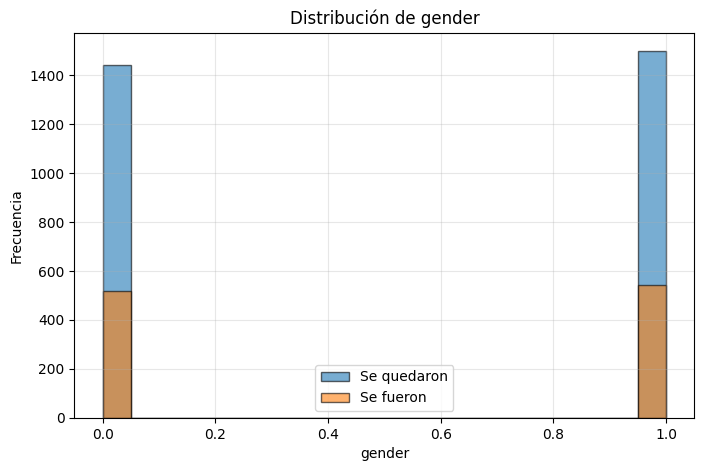

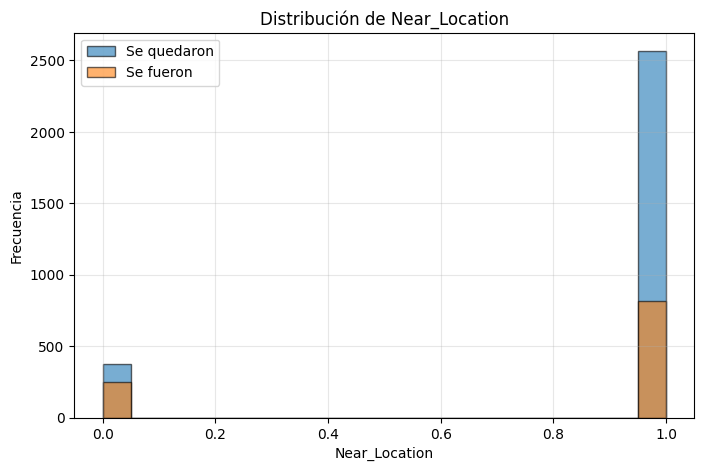

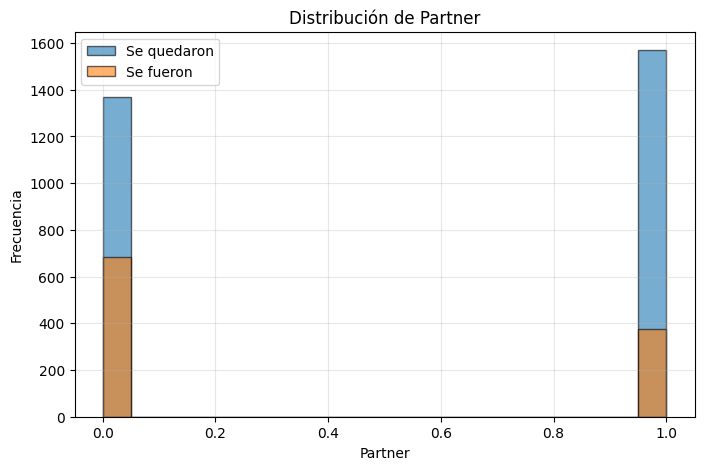

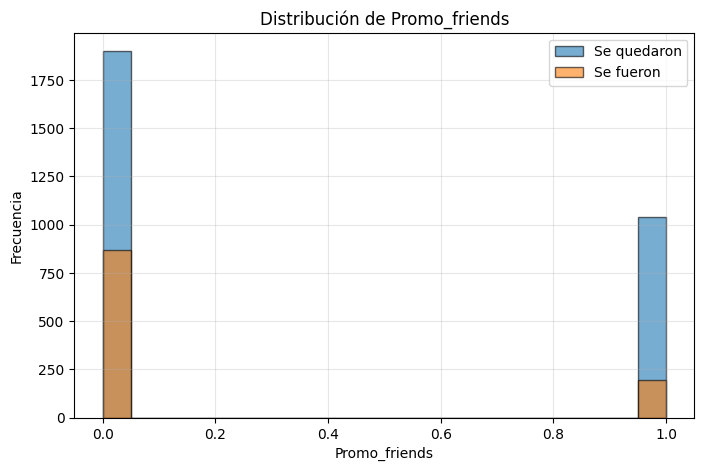

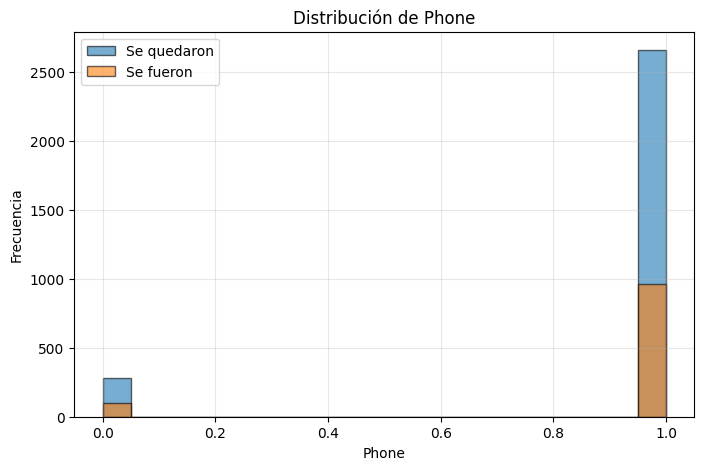

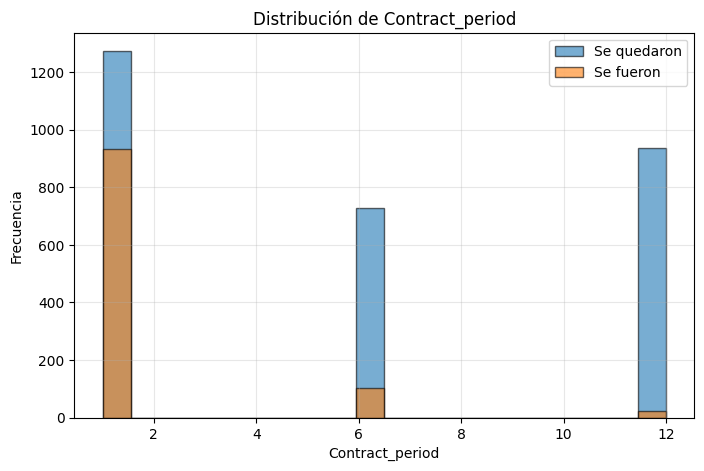

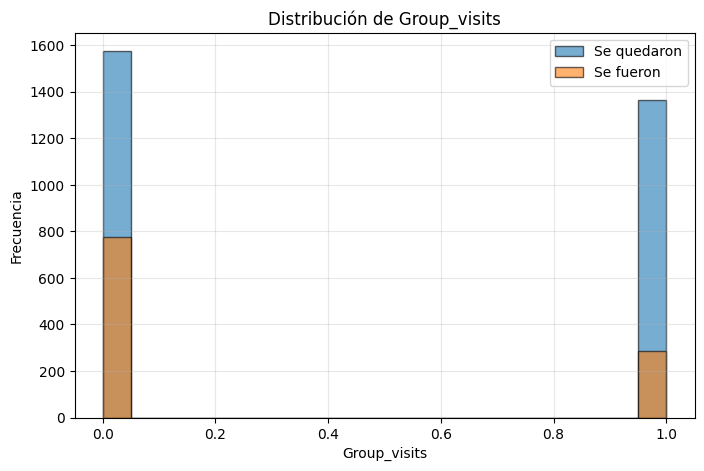

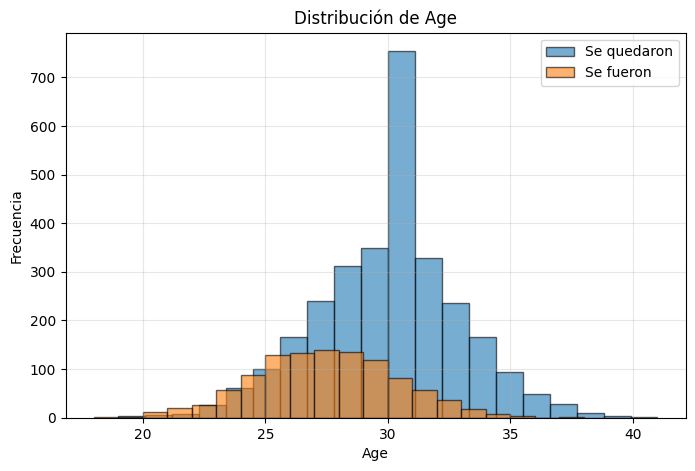

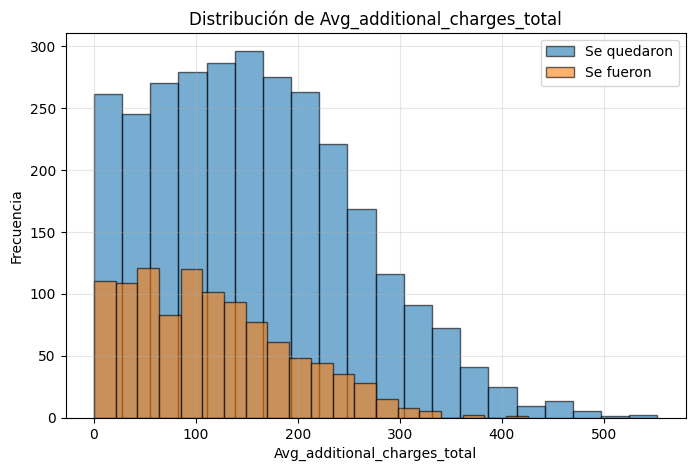

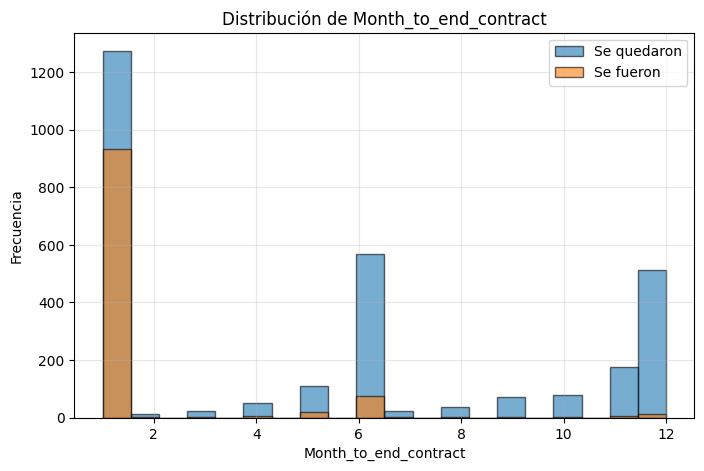

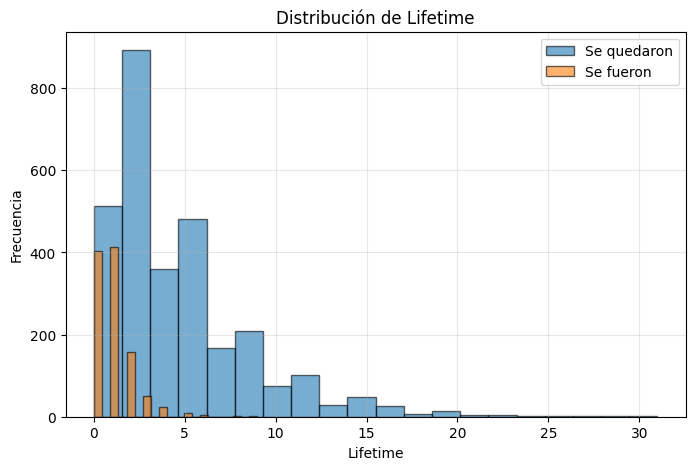

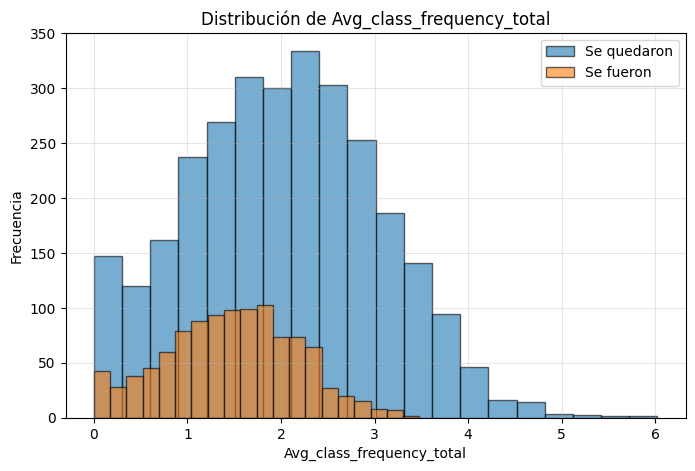

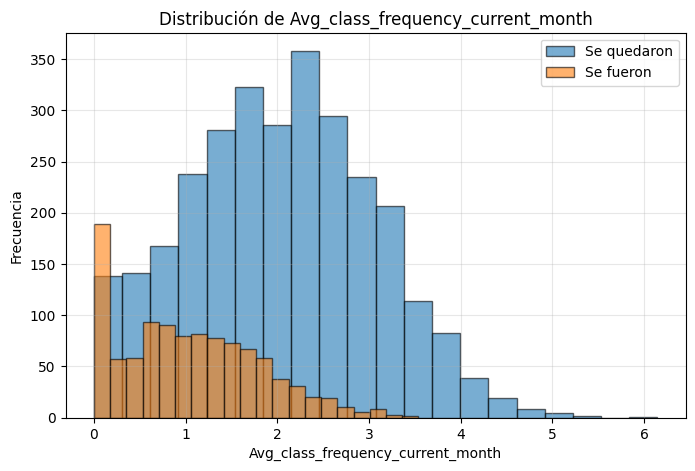

In [5]:
#Trazo de histogramas de Barras y distribuciones
# Separar los dos grupos
stay = gym[gym['Churn'] == 0]   # Personas que se quedaron
left = gym[gym['Churn'] == 1]   # Personas que se fueron

# Seleccionar solo columnas numéricas excepto 'Churn'
numeric_cols = gym.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

# Trazar histogramas comparados
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    plt.hist(stay[col], bins=20, alpha=0.6, label='Se quedaron', edgecolor='black')
    plt.hist(left[col], bins=20, alpha=0.6, label='Se fueron', edgecolor='black')
    
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


Se puede concluir con los graficos que las personas que cancelan tienen menos asistencia al gimnasio, suelen tener membresias mas cortas, y los usuarios con contrato mensual tienden a cancelar.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset
</div>

Matriz de correlación:
                                     gender  Near_Location   Partner  \
gender                             1.000000       0.006699 -0.010463   
Near_Location                      0.006699       1.000000 -0.005119   
Partner                           -0.010463      -0.005119  1.000000   
Promo_friends                     -0.005033       0.210964  0.451960   
Phone                             -0.008542      -0.015763  0.009970   
Contract_period                    0.000502       0.150233  0.306166   
Group_visits                       0.017879       0.154728  0.022710   
Age                                0.013807       0.058358  0.047480   
Avg_additional_charges_total      -0.009334       0.040761  0.022941   
Month_to_end_contract             -0.001281       0.143961  0.294632   
Lifetime                           0.013579       0.070921  0.061229   
Avg_class_frequency_total          0.014620       0.043127  0.024938   
Avg_class_frequency_current_month  0.0091

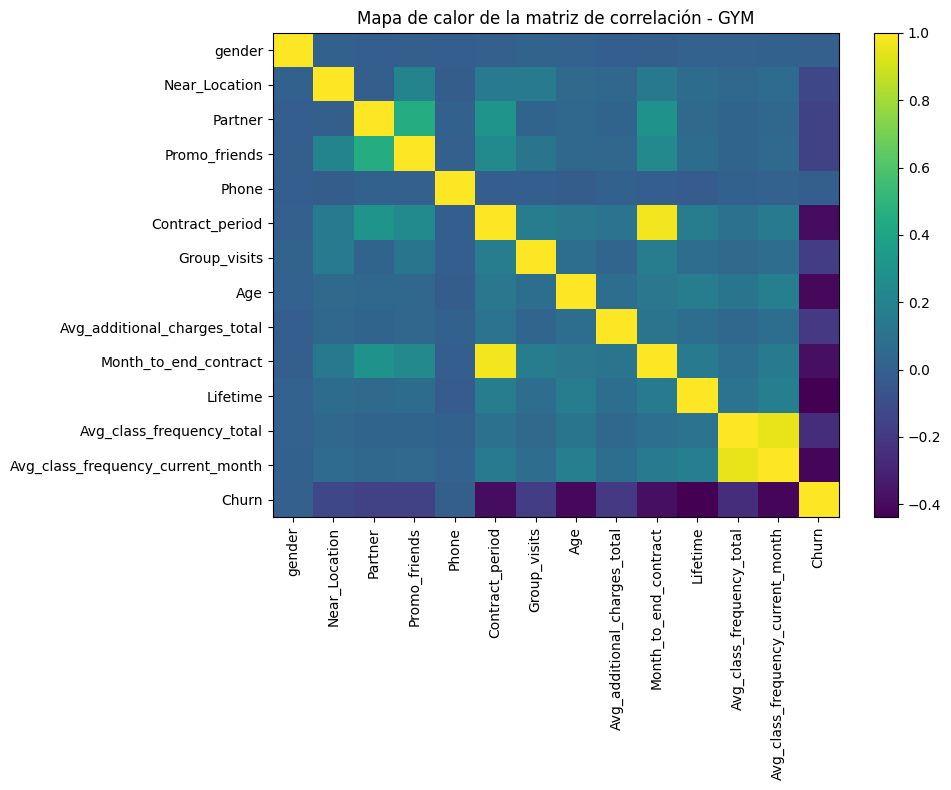

In [6]:
# Matriz de correlacion
# Crear matriz de correlación
corr = gym.corr()

# Mostrar matriz de correlación en consola
print("Matriz de correlación:")
print(corr)

# Graficar mapa de calor
plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect='auto')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Mapa de calor de la matriz de correlación - GYM")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

In [7]:
# Construir un modelo para predecir la cancelacion de usuarios
# Definir características (X) y variable objetivo (y)
# La variable objetivo es "Churn" (0 = se queda, 1 = se va)
X = gym.drop('Churn', axis=1)
y = gym['Churn']

# Dividir en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_valid_scaled)

# Evaluación del modelo
print("Exactitud (accuracy):", accuracy_score(y_valid, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_valid, y_pred))

Exactitud (accuracy): 0.925

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.93      0.92       800



In [8]:
# Entrenamiento de modelos
# ------------------------------
# MODELO 1: Regresión Logística
# ------------------------------
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_valid_scaled)

print("===== REGRESIÓN LOGÍSTICA =====")
print("Accuracy:", accuracy_score(y_valid, y_pred_logreg))
print(classification_report(y_valid, y_pred_logreg))

# ------------------------------
# MODELO 2: Bosque Aleatorio
# ------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'  
)

rf.fit(X_train, y_train)   

y_pred_rf = rf.predict(X_valid)

print("\n===== BOSQUE ALEATORIO =====")
print("Accuracy:", accuracy_score(y_valid, y_pred_rf))
print(classification_report(y_valid, y_pred_rf))

===== REGRESIÓN LOGÍSTICA =====
Accuracy: 0.925
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.93      0.92       800


===== BOSQUE ALEATORIO =====
Accuracy: 0.9175
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       588
           1       0.87      0.81      0.84       212

    accuracy                           0.92       800
   macro avg       0.90      0.88      0.89       800
weighted avg       0.92      0.92      0.92       800



In [9]:
# Evalúar la exactitud, precisión y recall
# =============================
# Evaluación de métricas
# =============================

print("=== REGRESIÓN LOGÍSTICA ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_logreg))
print("Precisión:", precision_score(y_valid, y_pred_logreg))
print("Recall:", recall_score(y_valid, y_pred_logreg))

print("\n=== RANDOM FOREST ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_rf))
print("Precisión:", precision_score(y_valid, y_pred_rf))
print("Recall:", recall_score(y_valid, y_pred_rf))

# =============================
# Comparación final
# =============================
print("\n=== COMPARACIÓN ===")
print("Mejor modelo (accuracy):",
      "Random Forest" if accuracy_score(y_valid, y_pred_rf) > accuracy_score(y_valid, y_pred_logreg) else "Regresión Logística")

print("Mejor modelo (precision):",
      "Random Forest" if precision_score(y_valid, y_pred_rf) > precision_score(y_valid, y_pred_logreg) else "Regresión Logística")

print("Mejor modelo (recall):",
      "Random Forest" if recall_score(y_valid, y_pred_rf) > recall_score(y_valid, y_pred_logreg) else "Regresión Logística")

=== REGRESIÓN LOGÍSTICA ===
Accuracy: 0.925
Precisión: 0.88
Recall: 0.8301886792452831

=== RANDOM FOREST ===
Accuracy: 0.9175
Precisión: 0.8724489795918368
Recall: 0.8066037735849056

=== COMPARACIÓN ===
Mejor modelo (accuracy): Regresión Logística
Mejor modelo (precision): Regresión Logística
Mejor modelo (recall): Regresión Logística


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
</div>

El modelo que dio mejores resultados fue regresion Logistica 

In [10]:
# Eliminar la columna de cancelación (target)
X = gym.drop('Churn', axis=1)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos estandarizados correctamente. Forma del dataset:", X_scaled.shape)

Datos estandarizados correctamente. Forma del dataset: (4000, 13)


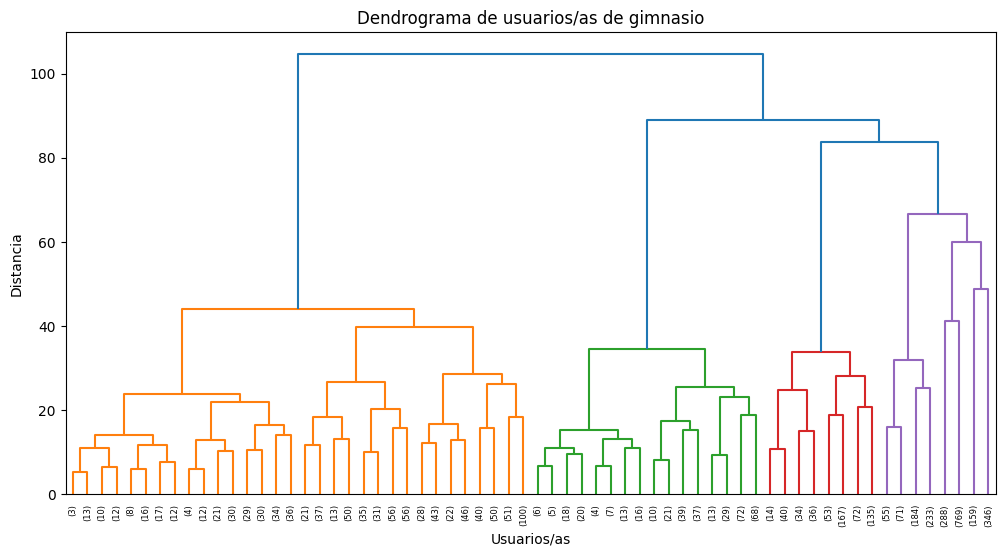

In [11]:
# Crear la matriz de distancias usando clustering jerárquico
Z = linkage(X_scaled, method='ward')   # ward minimiza varianza, recomendado

# Graficar el dendrograma
plt.figure(figsize=(12, 6))
plt.title("Dendrograma de usuarios/as de gimnasio")
plt.xlabel("Usuarios/as")
plt.ylabel("Distancia")

dendrogram(Z, truncate_mode='level', p=5) 
# truncate_mode='level' reduce tamaño; elimina si quieres verlo completo

plt.show()

In [12]:
# Entrenar modelo K-means con n = 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Predecir clústeres
clusters = kmeans.predict(X_scaled)

# Agregar los clústeres al DataFrame original
gym['cluster_kmeans'] = clusters

print("Clústeres asignados:")
print(gym['cluster_kmeans'].value_counts())

Clústeres asignados:
3    1227
1     889
2     865
0     633
4     386
Name: cluster_kmeans, dtype: int64


El cluster 3 se puede indicar que debe ser el foco del atencion del gimnasio ya son clientes nuevos, desenganchados, no traen amigos y casi no asisten. Altísimo riesgo de abandono. Este es el clúster crítico donde el gimnasio debería intervenir. 
El cluster 2 los clientes son comprometidos, conectados socialmente, viven cerca y tienen contrato anual. Clientes muy valiosos y muy fieles. Este clúster representa la “base estable” del gimnasio.
El Cluster 1 Son clientes activos y estables no traen muchos amigos pero asisten al gimnasio.
El Cluster 0 tiene un riesgo moderado son clientes que estan cerca del gimnasio pero no tan comprometidos para asistir si se trabaja puede rescatarse este cluster.
El cluster 4 son usuarios normales y esta como medio 

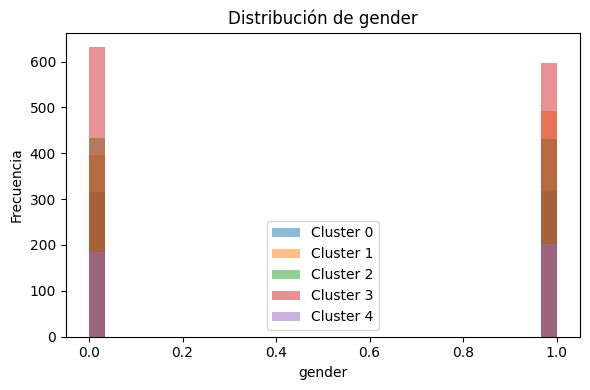

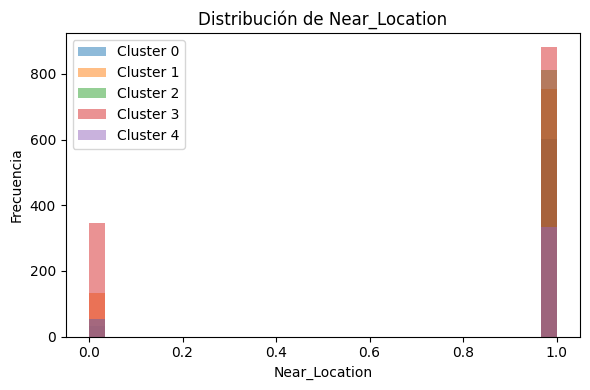

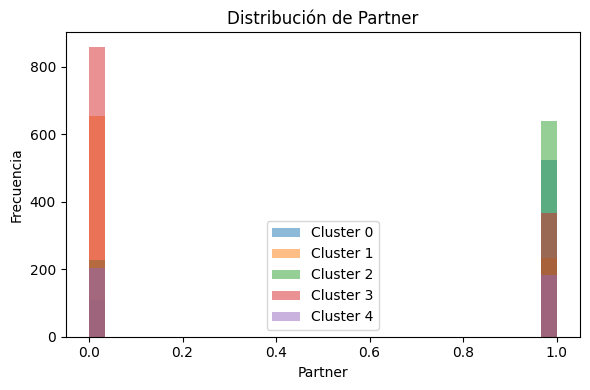

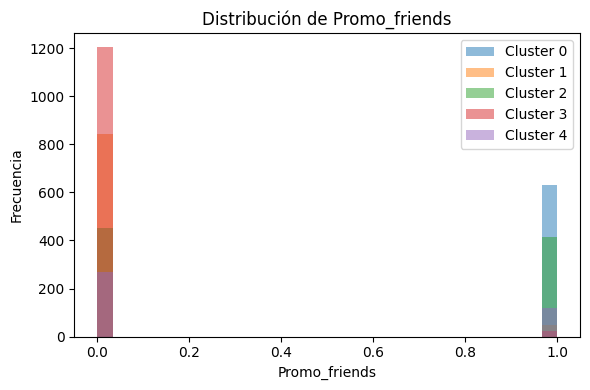

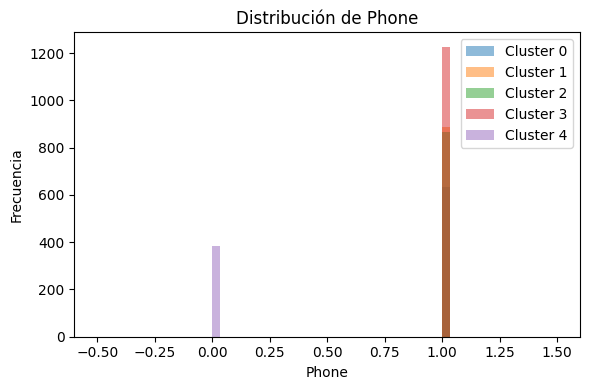

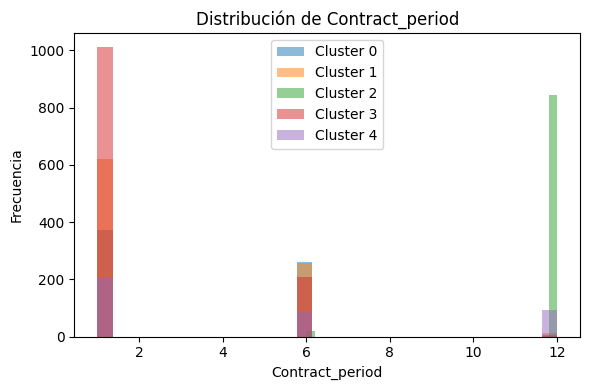

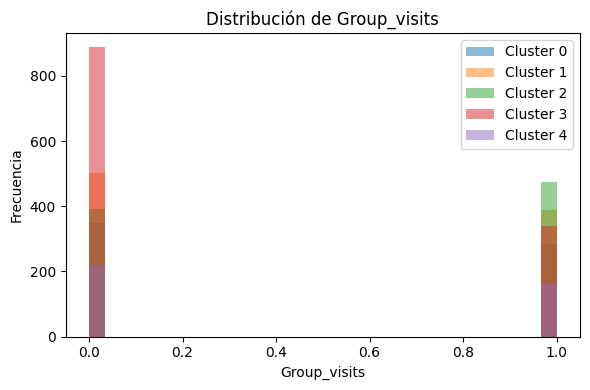

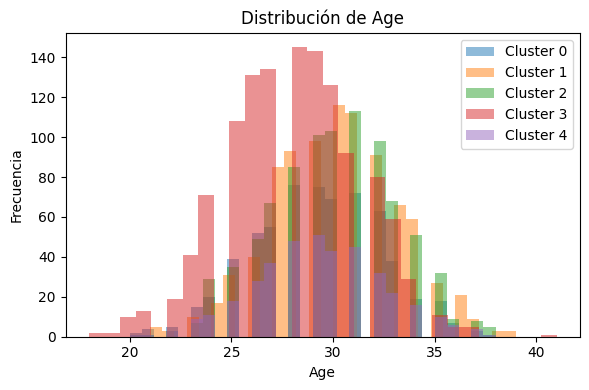

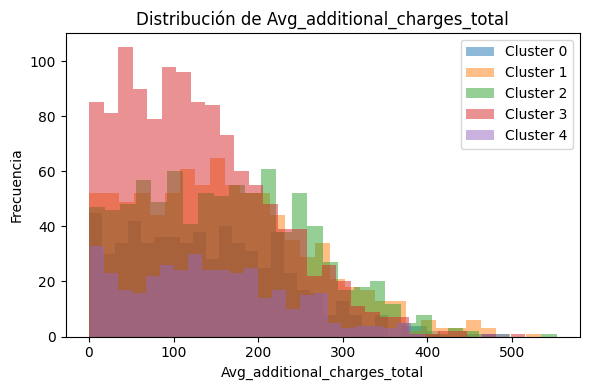

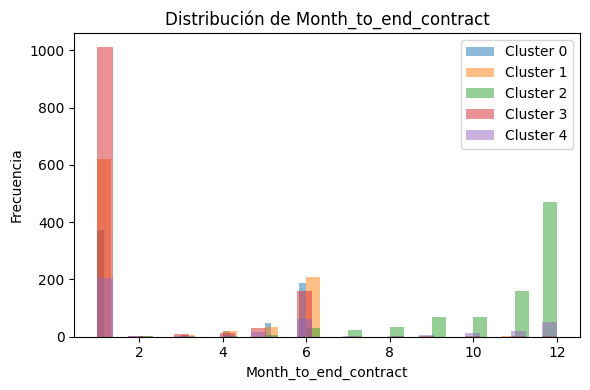

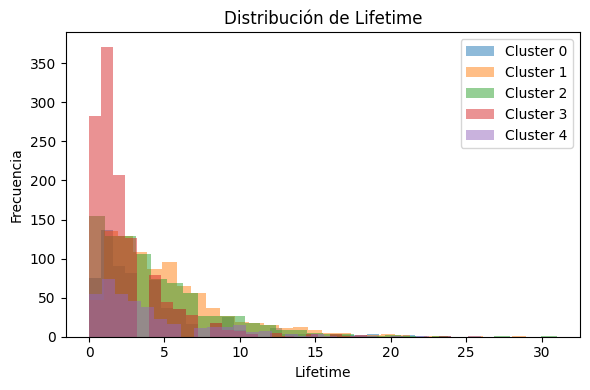

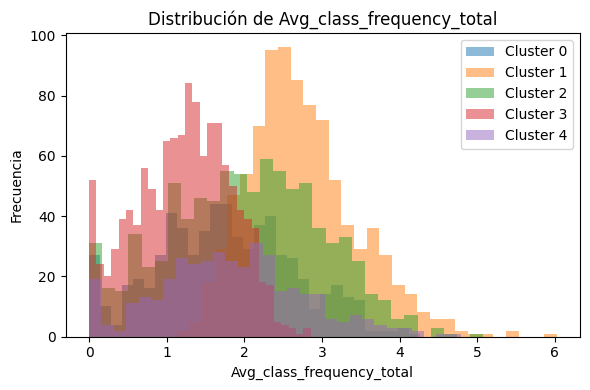

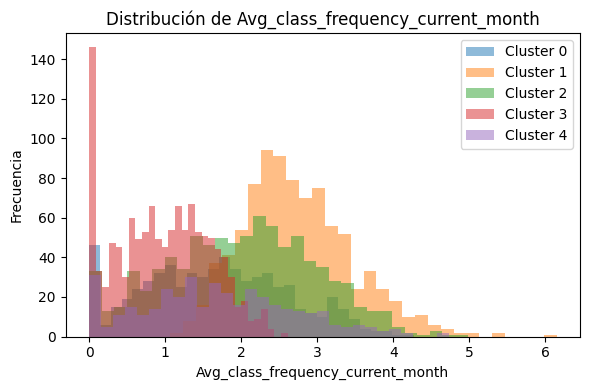

In [14]:
# Trazar distribuciones para los clusteres
for col in X.columns:
    plt.figure(figsize=(6,4))
    
    for cluster in sorted(gym['cluster_kmeans'].unique()):
        subset = gym[gym['cluster_kmeans'] == cluster][col]
        plt.hist(subset, bins=30, alpha=0.5, label=f'Cluster {cluster}')
    
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.tight_layout()
    plt.show()

1. La frecuencia de visitas es el separador más fuerte entre clústeres.
Clúster 3 = riesgo alto de churn.
Clúster 2 = clientes muy comprometidos.
2. Los clientes con menor antigüedad clúster 3 concentran la mayor tasa de churn.
3. El gasto adicional es un indicador fuerte de retención.
4. Los clientes lejos del gimnasio o sin apoyo social (pareja/amigos) abandonan más.


In [15]:
# Calcular la tasa de cancelación por clúster
churn_by_cluster = gym.groupby('cluster_kmeans')['Churn'].mean().sort_index()

print("Tasa de cancelación por clúster:")
print(churn_by_cluster)

Tasa de cancelación por clúster:
cluster_kmeans
0   0.246
1   0.090
2   0.022
3   0.573
4   0.267
Name: Churn, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
</div>

Los clústeres muestran patrones completamente distintos: 
CLUSTER PROPENSO A IRSE (ALTO RIESGO)
Clúster 3 — 57.3% de churn Es con diferencia, el grupo más riesgoso.
Los usuarios de este clúster suelen tener:
-baja asistencia
-baja frecuencia actual
-poco uso histórico
-poco interés en clases grupales
-menor lifetime
-contratos cortos
CLUSTERES LEALES (BAJO RIESGO)
Clúster 2 — 2.2% churn (EXCEPCIONALMENTE LEAL) Los mejores clientes:
-alta actividad
-alto gasto adicional
-alto lifetime
-muchos meses restantes de contrato

Clúster 1 — 9% churn Clientes estables y comprometidos.

CLUSTERES DE RIESGO MODERADO
Clúster 0 — 24.6%
Clúster 4 — 26.7%

Clientes que:
-muestran consumo promedio
-tienen actividad irregular
-no están tan comprometidos como 1 y 2
-pero no tan malos como el 3


CONCLUSIONES:
Para los cluster de alto riesgo y moderado se hace necesario invertir en marketing haciendo campañas de fidelizacion y promociones que puedan mantener la afiliacion como temas 2 x 1 para que sea referidos y tengan mas probabilidad de asistencia continua.

Para fortalecer la retencion en los clientes que tienen contrato a corto tiempo o en riesgo de cancelar se puede aplicar los siguientes pasos 1. LLamadas y mensajes de bienvenida 2. una clase gratis con entrenador 3. Un plan personalizado de ejercicio y nutricion para el primer mes 4. Ofertas al contrato 5. Sesiones de evaluacion fisica. 6. Mensajes motivacio

Incentivar la participación social y la frecuencia con los siguientes pasos 1. Trae un amigo o pareja y tendras un descuento 2. Eventos grupales como retos de la semana, entrenamiento grupal, clases de nutricion. 3. Bonos canjeables por asistir

Se debe cuidar los clientes leales para que refieran a otros con los siguientes pasos 1. Menbresias y tratos VIP 2. Descuentos por referidos 

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Planteaste muy buenas conclusiones en base a los datos de tu análisis, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>